In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('json_data.csv').drop(columns='Unnamed: 0')
df

,repo,language,readme_contents,length,clean,word_count,words
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411,"['freecodecamp', 'social', 'pull', 'request', ...",668,freecodecamp social pull request open source s...
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262,"['please', 'note', 'exists', 'official', 'acco...",444,please note exists official account app mercha...
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388,"['list', 'free', 'learning', 'resource', 'many...",365,list free learning resource many language div ...
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890,"['coding', 'interview', 'university', 'origina...",6509,coding interview university originally created...
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878,"['div', 'aligncenter', 'img', 'width500', 'hei...",2855,div aligncenter img width500 height350 altawes...
...,...,...,...,...,...,...,...
95,ripienaar/free-for-dev,HTML,# free-for.dev\n\nDevelopers and Open Source a...,223396,"['freefordev', 'developer', 'open', 'source', ...",17922,freefordev developer open source author massiv...
96,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...,4454,"['atom', 'build', 'atom', 'repository', 'atom'...",254,atom build atom repository atom archived decem...
97,pytorch/pytorch,C++,![PyTorch Logo](https://github.com/pytorch/pyt...,22336,"['pytorch', 'pytorch', 'python', 'package', 'p...",1530,pytorch pytorch python package provides two hi...
98,angular/angular.js,JavaScript,Using AngularJS with the Closure Compiler\n===...,927,"['using', 'angularjs', 'closure', 'compiler', ...",77,using angularjs closure compiler closure compi...


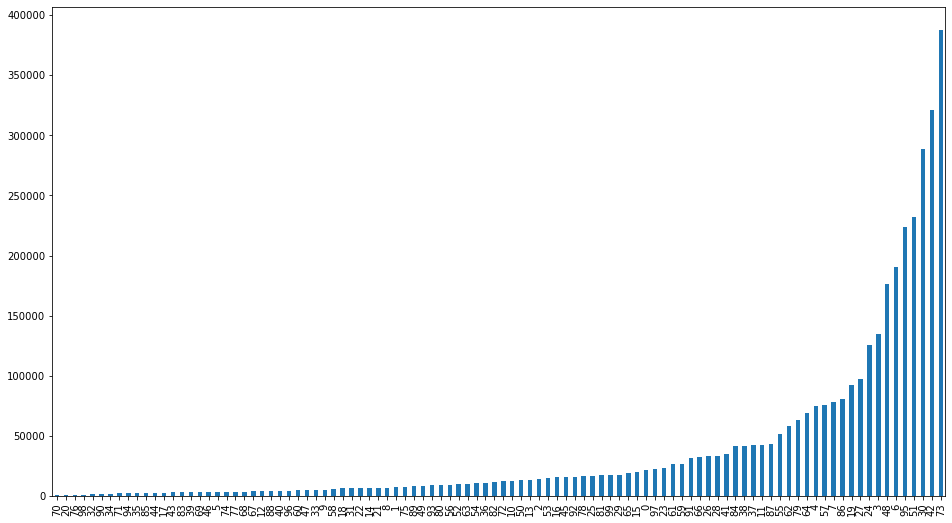

In [3]:
plt.figure(figsize=(16,9))
df.sort_values('length').length.plot.bar()
#plt.xlabel(data.language)
plt.show()

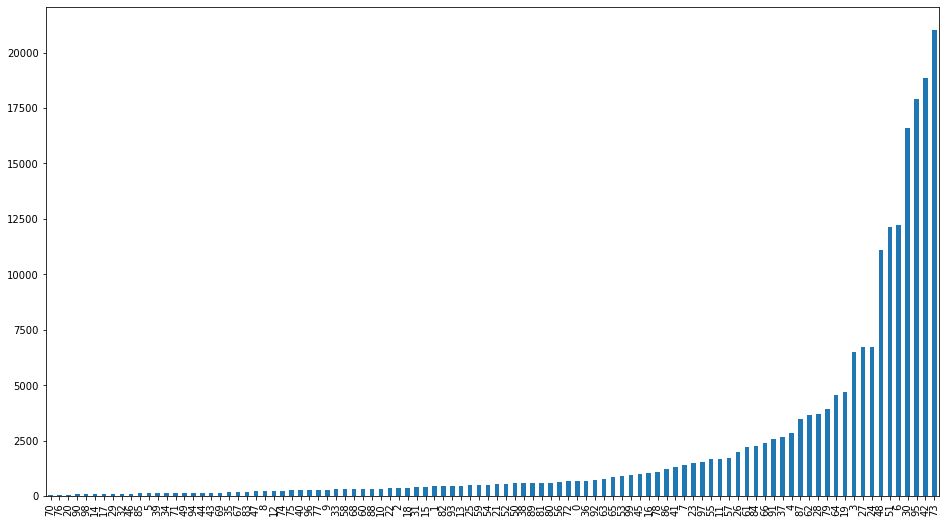

In [4]:
plt.figure(figsize=(16,9))
df.sort_values('word_count').word_count.plot.bar()
#plt.xlabel(data.language)
plt.show()

In [5]:
df.sort_values('word_count')[['word_count','length']]

,word_count,length
70,43,650
76,50,844
20,55,727
90,73,1770
98,77,927
...,...,...
6,12228,190404
30,16582,288480
95,17922,223396
42,18842,320583


<AxesSubplot:>

<Figure size 864x504 with 0 Axes>

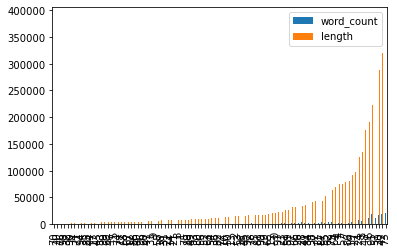

In [6]:
plt.figure(figsize=(12,7))
df.sort_values('length')[['word_count','length']].plot.bar()

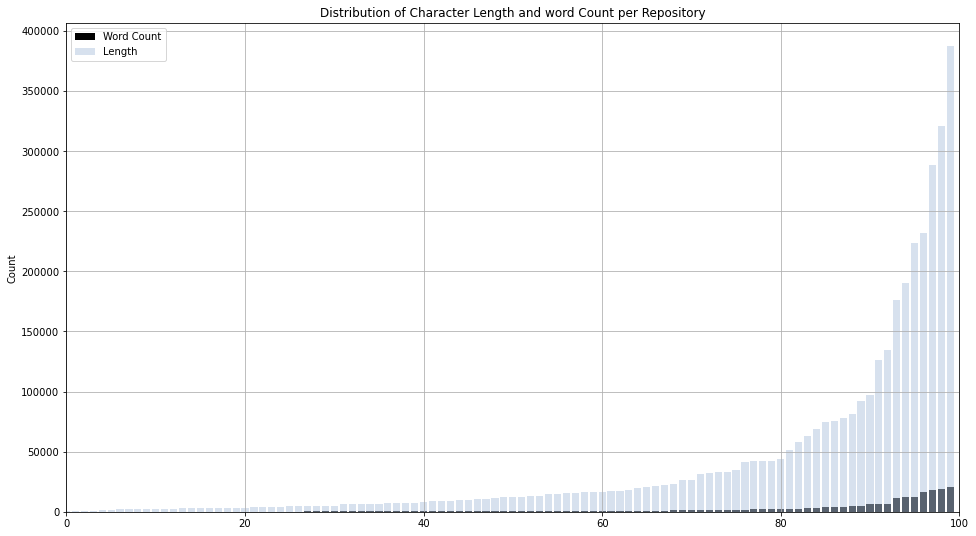

In [7]:
plt.figure(figsize=(16,9))
plt.bar(range(len(df.word_count)), sorted(df.word_count), color='black')
plt.bar(range(len(df.length)), sorted(df.length), color='lightsteelblue', alpha=0.5)
plt.ylabel('Count')
plt.xlim(0,100)
plt.grid()
plt.title('Distribution of Character Length and word Count per Repository')
plt.legend(['Word Count', 'Length'])
plt.show()

In [8]:
for val in df.language.value_counts().index:
    print(val)
    print(f'Frequency: {len(df[df.language == val])}')
    print(f'Mean: {round(df[df.language == val].length.mean())}')
    print(f'Max:  {df[df.language == val].length.max()}')
    print(f'Min:  {df[df.language == val].length.min()}')
    print('-----')

JavaScript
Frequency: 25
Mean: 36871
Max:  288480
Min:  650
-----
resources
Frequency: 17
Mean: 67646
Max:  387407
Min:  4258
-----
TypeScript
Frequency: 12
Mean: 10301
Max:  26763
Min:  3014
-----
Python
Frequency: 11
Mean: 52845
Max:  190404
Min:  2122
-----
C++
Frequency: 7
Mean: 9861
Max:  22336
Min:  844
-----
Go
Frequency: 7
Mean: 62435
Max:  320583
Min:  1455
-----
Shell
Frequency: 4
Mean: 17420
Max:  43631
Min:  3151
-----
Java
Frequency: 4
Mean: 29049
Max:  75595
Min:  8106
-----
C
Frequency: 3
Mean: 16443
Max:  32363
Min:  727
-----
Rust
Frequency: 2
Mean: 6467
Max:  10275
Min:  2659
-----
Vim Script
Frequency: 1
Mean: 6243
Max:  6243
Min:  6243
-----
Clojure
Frequency: 1
Mean: 12209
Max:  12209
Min:  12209
-----
PHP
Frequency: 1
Mean: 4134
Max:  4134
Min:  4134
-----
Markdown
Frequency: 1
Mean: 17805
Max:  17805
Min:  17805
-----
Vue
Frequency: 1
Mean: 9486
Max:  9486
Min:  9486
-----
C#
Frequency: 1
Mean: 15102
Max:  15102
Min:  15102
-----
Dart
Frequency: 1
Mean: 6800
Max:

In [9]:
for val in df.language.value_counts().index:
    print(f'{val} word_count')
    print(f'Frequency: {len(df[df.language == val])}')
    print(f'Mean: {round(df[df.language == val].word_count.mean())}')
    print(f'Max:  {df[df.language == val].word_count.max()}')
    print(f'Min:  {df[df.language == val].word_count.min()}')
    print('-----')

JavaScript word_count
Frequency: 25
Mean: 1961
Max:  16582
Min:  43
-----
resources word_count
Frequency: 17
Mean: 3382
Max:  21011
Min:  83
-----
TypeScript word_count
Frequency: 12
Mean: 382
Max:  965
Min:  107
-----
Python word_count
Frequency: 11
Mean: 2998
Max:  12228
Min:  88
-----
C++ word_count
Frequency: 7
Mean: 557
Max:  1530
Min:  50
-----
Go word_count
Frequency: 7
Mean: 3773
Max:  18842
Min:  102
-----
Shell word_count
Frequency: 4
Mean: 1227
Max:  3472
Min:  156
-----
Java word_count
Frequency: 4
Mean: 1110
Max:  1727
Min:  594
-----
C word_count
Frequency: 3
Mean: 1065
Max:  2406
Min:  55
-----
Rust word_count
Frequency: 2
Mean: 464
Max:  776
Min:  152
-----
Vim Script word_count
Frequency: 1
Mean: 301
Max:  301
Min:  301
-----
Clojure word_count
Frequency: 1
Mean: 659
Max:  659
Min:  659
-----
PHP word_count
Frequency: 1
Mean: 197
Max:  197
Min:  197
-----
Markdown word_count
Frequency: 1
Mean: 91
Max:  91
Min:  91
-----
Vue word_count
Frequency: 1
Mean: 619
Max:  619
M

JavaScript


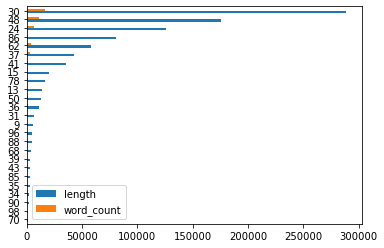

-----
resources


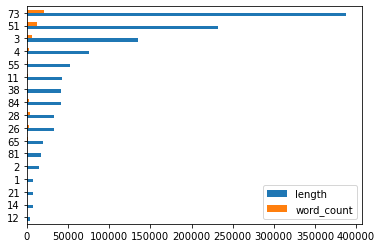

-----
TypeScript


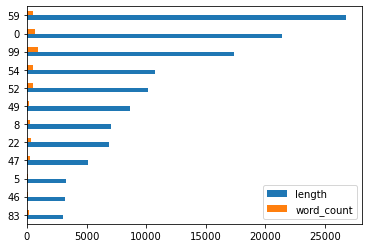

-----
Python


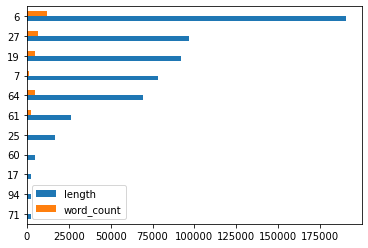

-----
C++


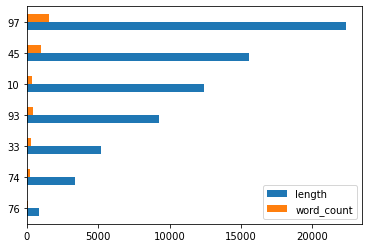

-----
Go


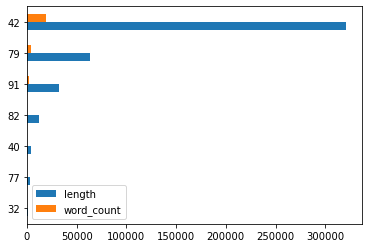

-----
Shell


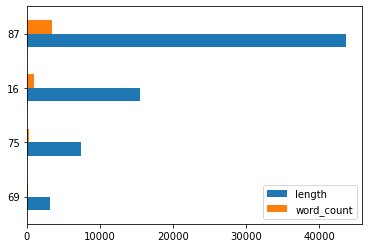

-----
Java


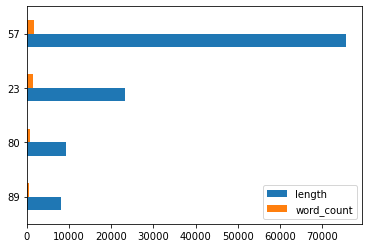

-----
C


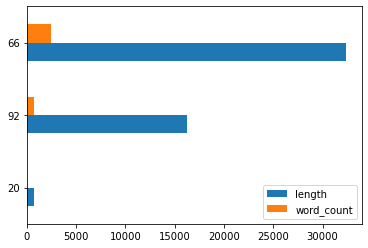

-----
Rust


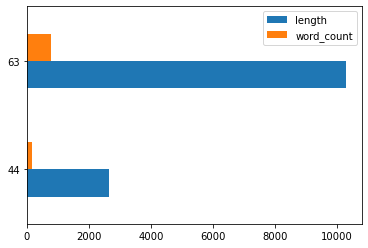

-----
Vim Script


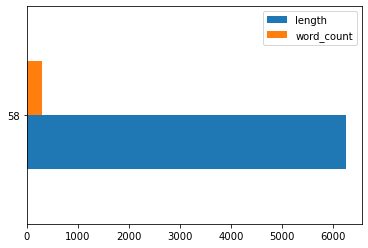

-----
Clojure


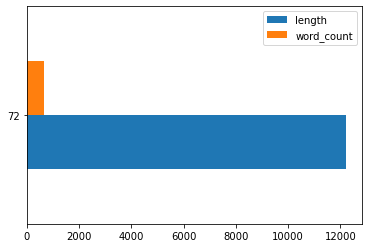

-----
PHP


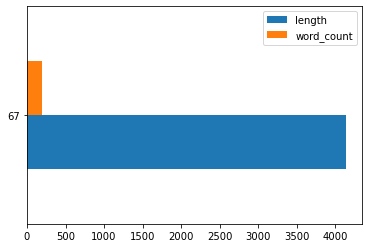

-----
Markdown


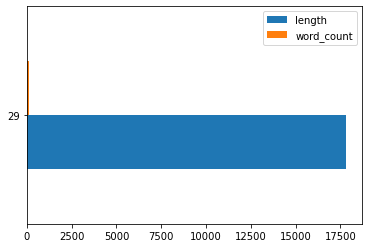

-----
Vue


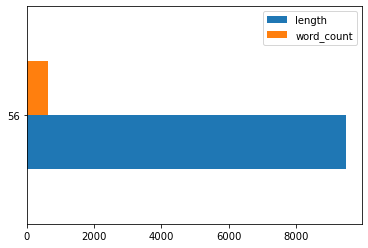

-----
C#


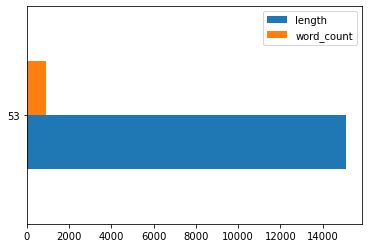

-----
Dart


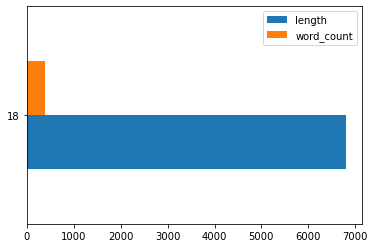

-----
HTML


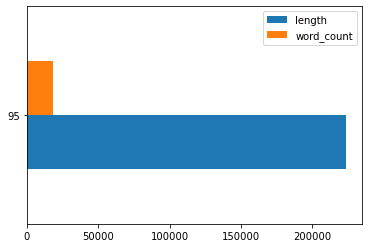

-----


In [10]:
for val in df.language.value_counts().index:
    print(val)
    df[df.language == val].sort_values('length').plot.barh()
    plt.show()
    print('-----')

In [11]:
wc = pd.read_csv('word_counts.csv', index_col=[0])
wc

,typescript,resource,python,javascript,c++,shell,dart,c,java,markdown,go,rust,c#,vue,vim,php,clojure,html,all
redux,69,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80
code,48,150,111,151,35,6,7,1,10,0,123,2,5,1,3,2,25,112,792
p,41,293,74,56,0,4,2,6,7,6,8,0,0,7,0,3,0,1,508
project,38,157,29,89,18,6,1,3,6,0,62,3,2,0,2,1,2,149,568
storybook,36,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25kmo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
oryhttpsorysh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
idp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
idaas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [12]:
wc.sort_values('typescript', ascending=False)[['typescript']].head(1).index

Index(['redux'], dtype='object')

In [13]:
for col in wc.columns:
    print(wc.sort_values(col, ascending=False)[[col]].head(1))

       typescript
redux          69
     resource
vue      1137
     python
yes    1738
        javascript
source        1014
        c++
window   74
     shell
nvm    220
         dart
flutter    21
          c
scrcpy  109
    java
td   216
          markdown
leetcode         7
      go
go  1221
       rust
build    36
           c#
powertoys  23
    vue
de   57
     vim
vim    9
         php
laravel   17
      clojure
code       25
      html
free  1065
      all
yes  1747


In [14]:
df.head()

,repo,language,readme_contents,length,clean,word_count,words
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411,"['freecodecamp', 'social', 'pull', 'request', ...",668,freecodecamp social pull request open source s...
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262,"['please', 'note', 'exists', 'official', 'acco...",444,please note exists official account app mercha...
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388,"['list', 'free', 'learning', 'resource', 'many...",365,list free learning resource many language div ...
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890,"['coding', 'interview', 'university', 'origina...",6509,coding interview university originally created...
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878,"['div', 'aligncenter', 'img', 'width500', 'hei...",2855,div aligncenter img width500 height350 altawes...


In [15]:
#df[['repo', 'language', 'readme_contents']].to_csv('original_json_data.csv')

In [16]:
df = pd.read_csv('original_json_data.csv', index_col=[0])
df.head()

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym..."


In [17]:
df

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym..."
...,...,...,...
95,ripienaar/free-for-dev,HTML,# free-for.dev\n\nDevelopers and Open Source a...
96,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...
97,pytorch/pytorch,C++,![PyTorch Logo](https://github.com/pytorch/pyt...
98,angular/angular.js,JavaScript,Using AngularJS with the Closure Compiler\n===...


In [18]:
def readme_length(df):
    '''Creates a column with the length (by # of characters) of the readme_contents column'''
    l = []
    for val in df.readme_contents.index:
        l.append(
            {
                'length': len(df.iloc[val].readme_contents),
            }
                )
    l = pd.DataFrame(l)
    df = df.join(l, how='right')
    return df

In [19]:
df = readme_length(df)
df

,repo,language,readme_contents,length
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878
...,...,...,...,...
95,ripienaar/free-for-dev,HTML,# free-for.dev\n\nDevelopers and Open Source a...,223396
96,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...,4454
97,pytorch/pytorch,C++,![PyTorch Logo](https://github.com/pytorch/pyt...,22336
98,angular/angular.js,JavaScript,Using AngularJS with the Closure Compiler\n===...,927


In [20]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text)#😉 # tokenization
    words = re.sub(r'\w{15,}','',words).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [21]:
def clean_readme(df):
    '''Creates a new column that encodes, decodes, lemmatizes and removes 
        words greater than 15 characters and puts them into a list'''
    df['clean'] = df.readme_contents.apply(clean)
    return df

In [22]:
df = clean_readme(df)
df.head()

,repo,language,readme_contents,length,clean
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411,"[freecodecamp, social, pull, request, open, so..."
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262,"[please, note, exists, official, account, app,..."
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388,"[list, free, learning, resource, many, languag..."
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890,"[coding, interview, university, originally, cr..."
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878,"[div, aligncenter, img, width500, height350, a..."


In [23]:
def word_count(df):
    '''Creates a column with number of words in the clean column'''
    w = []
    for val in df.readme_contents.index:
        w.append(
            {
                'word_count': len(df.clean.iloc[val]),
            }
                )
    w = pd.DataFrame(w)
    df = df.join(w, how='right')
    return df

In [24]:
df = word_count(df)
df.head()

,repo,language,readme_contents,length,clean,word_count
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411,"[freecodecamp, social, pull, request, open, so...",668
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262,"[please, note, exists, official, account, app,...",444
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388,"[list, free, learning, resource, many, languag...",365
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890,"[coding, interview, university, originally, cr...",6509
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878,"[div, aligncenter, img, width500, height350, a...",2855


In [25]:
def combined_words(df):
    '''Joins the list of words in the clean column to one string'''
    df['words'] = df.clean.apply(' '.join)
    return df

In [26]:
df = combined_words(df)
df.head()

,repo,language,readme_contents,length,clean,word_count,words
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,21411,"[freecodecamp, social, pull, request, open, so...",668,freecodecamp social pull request open source s...
1,996icu/996.ICU,resources,[996.ICU](https://996.icu/#/en_US)\n=======\n*...,7262,"[please, note, exists, official, account, app,...",444,please note exists official account app mercha...
2,EbookFoundation/free-programming-books,resources,# List of Free Learning Resources In Many Lang...,14388,"[list, free, learning, resource, many, languag...",365,list free learning resource many language div ...
3,jwasham/coding-interview-university,resources,# Coding Interview University\n\n> I originall...,134890,"[coding, interview, university, originally, cr...",6509,coding interview university originally created...
4,sindresorhus/awesome,resources,"<div align=""center"">\n\t<a href=""https://vshym...",74878,"[div, aligncenter, img, width500, height350, a...",2855,div aligncenter img width500 height350 altawes...


---

In [27]:
X = df.words
y = df.language
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=536)

In [28]:
X

0     freecodecamp social pull request open source s...
1     please note exists official account app mercha...
2     list free learning resource many language div ...
3     coding interview university originally created...
4     div aligncenter img width500 height350 altawes...
                            ...                        
95    freefordev developer open source author massiv...
96    atom build atom repository atom archived decem...
97    pytorch pytorch python package provides two hi...
98    using angularjs closure compiler closure compi...
99    height60 altredux logo redux predictable state...
Name: words, Length: 100, dtype: object

In [29]:
X_train.index.values

array([66, 63, 94, 96, 57, 29, 47, 55, 38,  5, 71, 65, 76, 49, 72, 17, 58,
       91, 67,  6,  7, 83, 13, 45,  4, 75,  2,  8, 88, 56, 48, 14, 21, 20,
        3, 24, 37, 33, 89, 10, 23, 64, 35, 16, 15, 79, 36, 19, 80, 32, 87,
        1, 39, 44, 69, 26, 59, 78, 77, 22,  0, 74, 12, 52, 81, 25, 30, 60,
       84, 73, 97, 93, 98, 53, 42, 27, 34, 85, 46, 28])

In [30]:
df.word_count.iloc[X_train.index.values]

66    2406
63     776
94     143
96     254
57    1727
      ... 
27    6722
34     131
85     116
46     107
28    3692
Name: word_count, Length: 80, dtype: int64

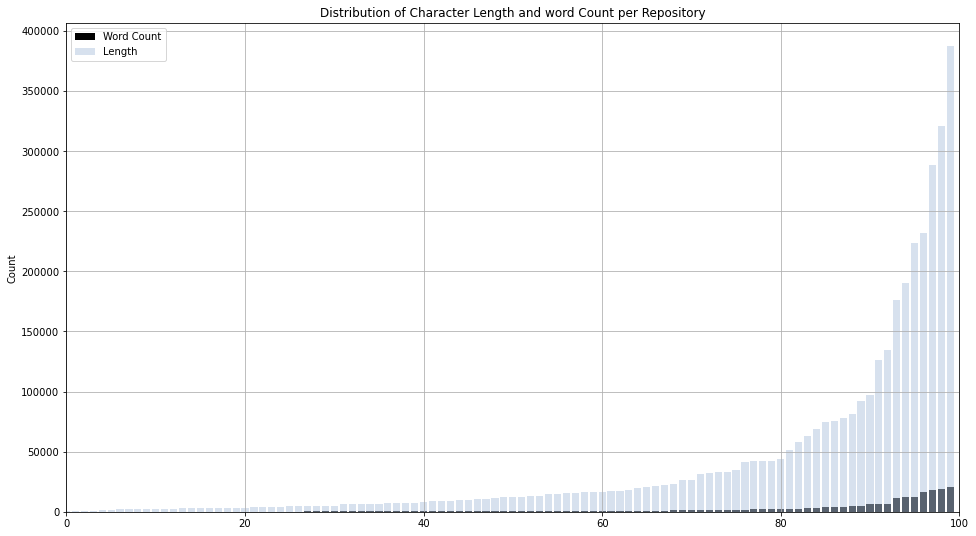

In [31]:
plt.figure(figsize=(16,9))
plt.bar(range(len(df.word_count)), sorted(df.word_count), color='black')
plt.bar(range(len(df.length)), sorted(df.length), color='lightsteelblue', alpha=0.5)
plt.ylabel('Count')
plt.xlim(0,100)
plt.grid()
plt.title('Distribution of Character Length and word Count per Repository')
plt.legend(['Word Count', 'Length'])
plt.show()

In [33]:
def train_count(df, X_train):
    plt.figure(figsize=(16,9))
    plt.bar(range(len(df.word_count.iloc[X_train.index.values])), sorted(df.word_count.iloc[X_train.index.values]), color='black')
    plt.bar(range(len(df.length.iloc[X_train.index.values])), sorted(df.length.iloc[X_train.index.values]), color='lightsteelblue', alpha=0.5)
    plt.ylabel('Count')
    plt.xlim(0,80)
    plt.grid()
    plt.title('Distribution of Character Length and word Count per Repository')
    plt.legend(['Word Count', 'Length'])
    plt.show()

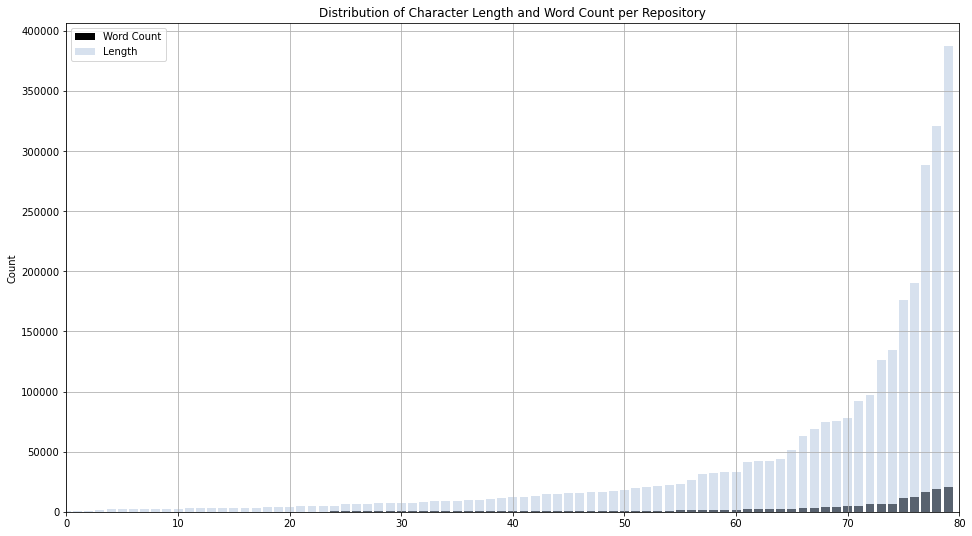

In [37]:
plt.figure(figsize=(16,9))
plt.bar(range(len(df.word_count.iloc[X_train.index.values])), sorted(df.word_count.iloc[X_train.index.values]), color='black')
plt.bar(range(len(df.length.iloc[X_train.index.values])), sorted(df.length.iloc[X_train.index.values]), color='lightsteelblue', alpha=0.5)
plt.ylabel('Count')
plt.xlim(0,80)
plt.grid()
plt.title('Distribution of Character Length and Word Count per Repository')
plt.legend(['Word Count', 'Length'])
plt.show()

In [34]:
X_test.index

Int64Index([95, 9, 62, 50, 40, 70, 61, 99, 43, 90, 51, 41, 68, 92, 31, 86, 18,
            11, 82, 54],
           dtype='int64')

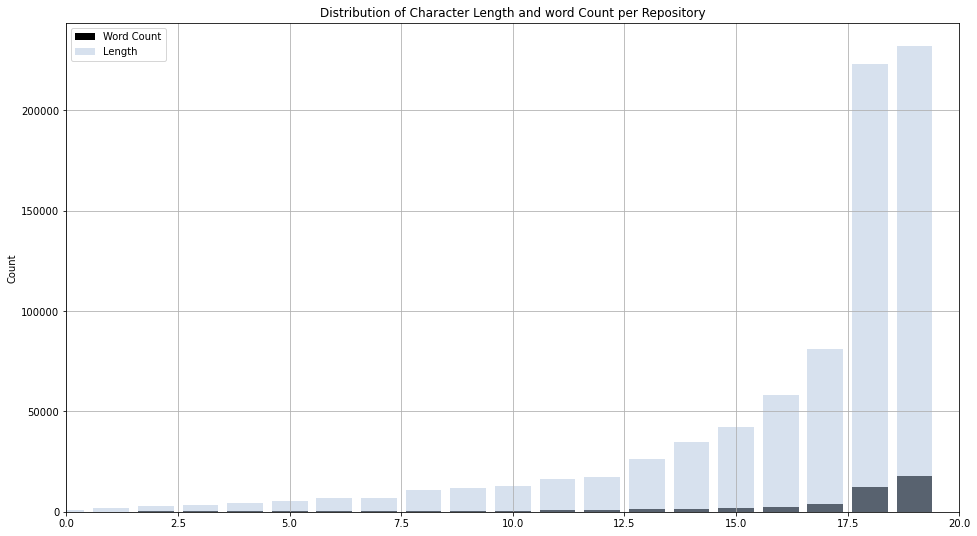

In [35]:
plt.figure(figsize=(16,9))
plt.bar(range(len(df.word_count.iloc[X_test.index.values])), sorted(df.word_count.iloc[X_test.index.values]), color='black')
plt.bar(range(len(df.length.iloc[X_test.index.values])), sorted(df.length.iloc[X_test.index.values]), color='lightsteelblue', alpha=0.5)
plt.ylabel('Count')
plt.xlim(0,20)
plt.grid()
plt.title('Distribution of Character Length and word Count per Repository')
plt.legend(['Word Count', 'Length'])
plt.show()